## Step 1: Preprocess the Data

In [0]:
# Load the data
import pandas as pd
training_data_df = pd.read_csv('sales_data_training.csv')

In [104]:
training_data_df.head()

,critic_rating,is_action,is_exclusive_to_us,is_portable,is_role_playing,is_sequel,is_sports,suitable_for_kids,total_earnings,unit_price
0,3.5,1,0,1,0,1,0,0,132717,59.99
1,4.5,0,0,0,0,1,1,0,83407,49.99
2,3.0,0,0,0,0,1,1,0,62423,49.99
3,4.5,1,0,0,0,0,0,1,69889,39.99
4,4.0,1,0,1,0,1,0,1,161382,59.99


In [0]:
X_train = training_data_df.drop(columns = ['total_earnings'])
y_train = training_data_df[['total_earnings']]

In [0]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [107]:
from sklearn.externals import joblib
joblib.dump(scaler, "scaler.pkl")  

['scaler.pkl']

In [0]:
scaler = joblib.load("scaler.pkl")

In [109]:
scaler.inverse_transform(X_train)

array([[ 3.5 ,  1.  ,  0.  , ...,  0.  ,  0.  , 59.99],
       [ 4.5 ,  0.  ,  0.  , ...,  1.  ,  0.  , 49.99],
       [ 3.  ,  0.  ,  0.  , ...,  1.  ,  0.  , 49.99],
       ...,
       [ 4.5 ,  0.  ,  1.  , ...,  0.  ,  0.  , 59.99],
       [ 3.5 ,  1.  ,  1.  , ...,  0.  ,  1.  , 39.99],
       [ 3.  ,  1.  ,  0.  , ...,  0.  ,  1.  , 49.99]])

In [110]:
X_train

array([[0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.83333333, 0.        , 0.        , ..., 1.        , 0.        ,
        0.5       ],
       [0.33333333, 0.        , 0.        , ..., 1.        , 0.        ,
        0.5       ],
       ...,
       [0.83333333, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 1.        , 0.        , ..., 0.        , 1.        ,
        0.5       ]])

## Step 2: Build the NN Model

In [0]:
import keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(50,input_dim=9,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='linear'))

In [114]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 50)                500       
_________________________________________________________________
dense_18 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_19 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 201       
Total params: 26,001
Trainable params: 26,001
Non-trainable params: 0
_________________________________________________________________


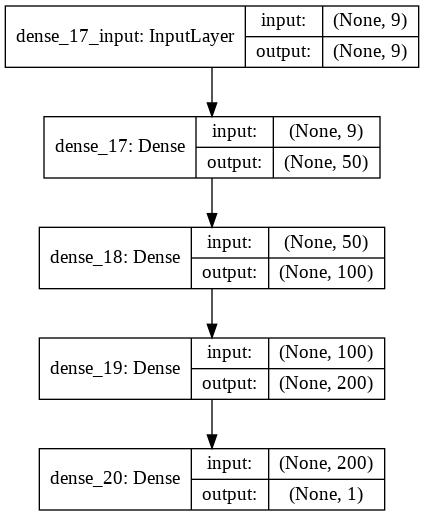

In [115]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

## Step 3: Compile the Model

In [0]:
model.compile(loss='mean_squared_error',optimizer='adam')

## Step 4: Train the Model

In [117]:
history = model.fit(X_train,y_train,
                    epochs = 50,
                    batch_size = 32,
                    shuffle = True,
                    validation_split = 0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 1s 908us/step - loss: 14487958773.7600 - val_loss: 13423691735.0400
Epoch 2/50
800/800 [==============================] - 0s 74us/step - loss: 14481739571.2000 - val_loss: 13409355857.9200
Epoch 3/50
800/800 [==============================] - 0s 72us/step - loss: 14442208460.8000 - val_loss: 13333655674.8800
Epoch 4/50
800/800 [==============================] - 0s 68us/step - loss: 14283424399.3600 - val_loss: 13061094113.2800
Epoch 5/50
800/800 [==============================] - 0s 74us/step - loss: 13793396531.2000 - val_loss: 12336738467.8400
Epoch 6/50
800/800 [==============================] - 0s 71us/step - loss: 12687323627.5200 - val_loss: 10830007582.7200
Epoch 7/50
800/800 [==============================] - 0s 74us/step - loss: 10613283737.6000 - val_loss: 8343328972.8000
Epoch 8/50
800/800 [==============================] - 0s 73us/step - loss: 7555722813.4400 - val_loss: 5101

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

In [0]:
# history.history

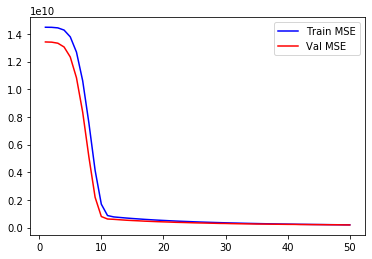

In [120]:
import matplotlib.pyplot as plt
plt.plot(epochs, loss,'b',label='Train MSE')
plt.plot(epochs, val_loss,'r',label='Val MSE')
plt.legend()
plt.show()

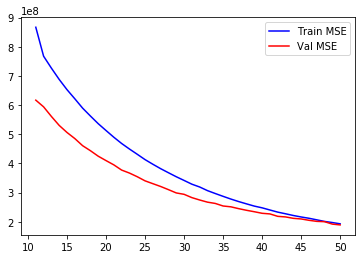

In [121]:
plt.plot(epochs[10:], loss[10:],'b',label='Train MSE')
plt.plot(epochs[10:], val_loss[10:],'r',label='Val MSE')
plt.legend()
plt.show()

## Step 5: Evaluate the Model

In [0]:
# Load the data
testing_data_df = pd.read_csv('sales_data_testing.csv')

In [0]:
X_test = testing_data_df.drop(columns = ['total_earnings'])
y_test = testing_data_df[['total_earnings']]

In [0]:
X_test = scaler.transform(X_test)

In [125]:
model.evaluate(X_test, y_test)

400/400 [==============================] - 0s 55us/step


202282581.76

In [126]:
y_pred= model.predict(X_test)
y_pred

array([[204698.92 ],
       [ 82563.48 ],
       [ 83704.62 ],
       [151852.   ],
       [112680.22 ],
       [115398.85 ],
       [103491.15 ],
       [195971.03 ],
       [156946.2  ],
       [153474.31 ],
       [103740.96 ],
       [121880.38 ],
       [118770.445],
       [122615.01 ],
       [146691.81 ],
       [ 90740.58 ],
       [111376.164],
       [ 38196.39 ],
       [103740.96 ],
       [119716.18 ],
       [ 89599.43 ],
       [126607.016],
       [153474.31 ],
       [ 95497.89 ],
       [142515.97 ],
       [111376.164],
       [153885.75 ],
       [ 91360.98 ],
       [ 80691.34 ],
       [113365.1  ],
       [ 82563.48 ],
       [177027.38 ],
       [ 89669.055],
       [172890.25 ],
       [ 85531.93 ],
       [ 69518.27 ],
       [134784.1  ],
       [ 76208.83 ],
       [162455.66 ],
       [188654.1  ],
       [ 44784.57 ],
       [ 64695.594],
       [135838.34 ],
       [ 60035.133],
       [113676.24 ],
       [ 94540.8  ],
       [ 49339.703],
       [20097

In [127]:
y_test.std()

total_earnings    46933.293266
dtype: float64

In [128]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test) ** 0.5

14222.607166156944

In [129]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.8609698507880014

## Step 6: Save Model

In [0]:
model.save('regression.h5')

In [0]:
from keras.models import load_model

## Step 7: Load Model and Prediction

In [0]:
model = load_model('regression.h5')

In [133]:
single_record = [[3.5,1,	0,	1,	0,	1,	0,	0,	59.99]]
single_scaled = scaler.transform(single_record)
single_scaled

array([[0.5, 1. , 0. , 1. , 0. , 1. , 0. , 0. , 1. ]])

In [134]:
y_pred

array([[204698.92 ],
       [ 82563.48 ],
       [ 83704.62 ],
       [151852.   ],
       [112680.22 ],
       [115398.85 ],
       [103491.15 ],
       [195971.03 ],
       [156946.2  ],
       [153474.31 ],
       [103740.96 ],
       [121880.38 ],
       [118770.445],
       [122615.01 ],
       [146691.81 ],
       [ 90740.58 ],
       [111376.164],
       [ 38196.39 ],
       [103740.96 ],
       [119716.18 ],
       [ 89599.43 ],
       [126607.016],
       [153474.31 ],
       [ 95497.89 ],
       [142515.97 ],
       [111376.164],
       [153885.75 ],
       [ 91360.98 ],
       [ 80691.34 ],
       [113365.1  ],
       [ 82563.48 ],
       [177027.38 ],
       [ 89669.055],
       [172890.25 ],
       [ 85531.93 ],
       [ 69518.27 ],
       [134784.1  ],
       [ 76208.83 ],
       [162455.66 ],
       [188654.1  ],
       [ 44784.57 ],
       [ 64695.594],
       [135838.34 ],
       [ 60035.133],
       [113676.24 ],
       [ 94540.8  ],
       [ 49339.703],
       [20097

# Challenge: Regression

In [0]:
# Load the data
training_data_df = pd.read_csv('boston.csv')

In [136]:
# median house val
training_data_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [0]:
X = training_data_df.drop(columns = ['medv', 'ID'])
y = training_data_df[['medv']]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)

In [0]:
# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
X_train.shape[1]

13

In [0]:
model = Sequential()
model.add(Dense(50,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='linear'))

In [0]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [143]:
history = model.fit(X_train,y_train,
                    epochs=50,
                    shuffle=True,
                    validation_split = 0.2)

Train on 186 samples, validate on 47 samples
Epoch 1/50
186/186 [==============================] - 1s 4ms/step - loss: 591.8901 - val_loss: 566.7748
Epoch 2/50
186/186 [==============================] - 0s 121us/step - loss: 564.0125 - val_loss: 534.6743
Epoch 3/50
186/186 [==============================] - 0s 113us/step - loss: 526.1739 - val_loss: 485.2437
Epoch 4/50
186/186 [==============================] - 0s 126us/step - loss: 463.0964 - val_loss: 406.1949
Epoch 5/50
186/186 [==============================] - 0s 139us/step - loss: 368.5915 - val_loss: 291.9259
Epoch 6/50
186/186 [==============================] - 0s 117us/step - loss: 245.5422 - val_loss: 164.8573
Epoch 7/50
186/186 [==============================] - 0s 113us/step - loss: 146.7441 - val_loss: 94.8935
Epoch 8/50
186/186 [==============================] - 0s 123us/step - loss: 130.6550 - val_loss: 95.1173
Epoch 9/50
186/186 [==============================] - 0s 118us/step - loss: 126.3309 - val_loss: 79.8499
Epoch 

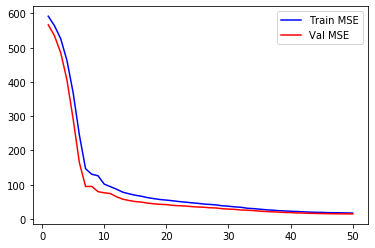

In [144]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

import matplotlib.pyplot as plt
plt.plot(epochs, loss,'b',label='Train MSE')
plt.plot(epochs, val_loss,'r',label='Val MSE')
plt.legend()
plt.show()

In [145]:
model.evaluate(X_test, y_test)

100/100 [==============================] - 0s 70us/step


22.805752716064454

In [146]:
y_pred= model.predict(X_test)
y_pred

array([[43.04972  ],
       [11.497294 ],
       [15.251545 ],
       [31.346113 ],
       [19.752028 ],
       [23.664635 ],
       [14.028447 ],
       [17.731287 ],
       [22.240637 ],
       [33.57318  ],
       [26.58602  ],
       [19.366484 ],
       [37.83046  ],
       [18.133528 ],
       [19.410034 ],
       [11.42118  ],
       [ 7.5526595],
       [27.158419 ],
       [26.129992 ],
       [23.000603 ],
       [18.190985 ],
       [24.615215 ],
       [25.690638 ],
       [18.173782 ],
       [14.50654  ],
       [24.646109 ],
       [23.731758 ],
       [21.048216 ],
       [21.479765 ],
       [ 9.217889 ],
       [35.291733 ],
       [24.132109 ],
       [22.027206 ],
       [14.517893 ],
       [21.956942 ],
       [39.167664 ],
       [30.368015 ],
       [18.893555 ],
       [39.69604  ],
       [16.753654 ],
       [23.791384 ],
       [21.041521 ],
       [22.53905  ],
       [18.327658 ],
       [47.565678 ],
       [21.311472 ],
       [25.83042  ],
       [11.25

In [147]:
mean_squared_error(y_pred, y_test) ** 0.5

4.7755368935200915

In [148]:
r2_score(y_pred, y_test)

0.6511386183305585